## Risk Factor Analysis 

The UNICEF CCRI data consists of climate risk and child vulnerability indicators for all the countries in Africa. The goal of this thread of analysis is to condense these 27 indicators, and potentially other derived indicators from the conflict data analsyis, and metrics from World Risk index into fewer interpretable categories/factors. This would allow us to create compelling visualizations of these fewer factors for each country to easily capture the different factors. Some examples of the types of visualizations that would be interesting are what are known as [spider/web charts](https://r-graph-gallery.com/spider-or-radar-chart.html).

### Tasks to get started
- Based on the correlation of these different variables, can we use Factor Analysis to simplify these 27 indicators into fewer categories (ex: Climate risk, Health, Environment/pollution, etc.) 
- These is additional data for these indicators in Kenya at the sub-national level (`CONTEXT/Kenya_CCRI_DRM.csv`). Does adding these improve the reliability of factor analysis?
- How can we use the World Risk Index metrics into this analysis?


In [1]:
%load_ext autoreload
%autoreload 2

#### Integrated LLM support

We're using the [LM Sandbox](https://gitlab.app.twosigma.com/main/ts.d/user.d/leif.d/lmsandbox-git) developed by Leif Walsh to provide LLM-based support within notebooks. We have a local clone of the library added into the `src/` directory and you can load it in as below

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../src'))
sys.path.insert(0, module_path)

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# The following parameter will help make our visualizations a bit larger than the default
plt.rcParams['figure.figsize'] = (10,10) 
import warnings
warnings.filterwarnings('ignore')

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.11.3-CAPI-1.17.3) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [4]:
context = pd.read_csv('../data/raw/CCRI.csv')

In [5]:
context.head()

,REF_AREA,Geographic area,INDICATOR,Indicator,UNIT_MULTIPLIER,Unit multiplier,UNIT_MEASURE,Unit of measure,TIME_PERIOD,OBS_VALUE,OBS_FOOTNOTE,DATA_SOURCE,OBS_STATUS,Observation Status
0,DZA,Algeria,CCRI_WATER_SCARCITY,Water scarcity,NaN,NaN,IDX,Index,2020,Extremely High,Value: 9.5,"World Resources Institute (WRI) Aqueduct 3.0, ...",NaN,NaN
1,AGO,Angola,CCRI_WATER_SCARCITY,Water scarcity,NaN,NaN,IDX,Index,2020,Extremely High,Value: 8.3,"World Resources Institute (WRI) Aqueduct 3.0, ...",NaN,NaN
2,BEN,Benin,CCRI_WATER_SCARCITY,Water scarcity,NaN,NaN,IDX,Index,2020,Medium-High,Value: 4.2,"World Resources Institute (WRI) Aqueduct 3.0, ...",NaN,NaN
3,BWA,Botswana,CCRI_WATER_SCARCITY,Water scarcity,NaN,NaN,IDX,Index,2020,Extremely High,Value: 9.2,"World Resources Institute (WRI) Aqueduct 3.0, ...",NaN,NaN
4,BFA,Burkina Faso,CCRI_WATER_SCARCITY,Water scarcity,NaN,NaN,IDX,Index,2020,Extremely High,Value: 9.7,"World Resources Institute (WRI) Aqueduct 3.0, ...",NaN,NaN


In [7]:
## Extracting indicator value from OBS_FOOTNOTE
context['value'] = context.OBS_FOOTNOTE.str.replace('Value: ','').astype(float)

In [15]:
len(context.INDICATOR.unique())

27

In [11]:
## Pivoting the Dataframe and calculating correlations
context_pvt = context.pivot(index='Geographic area', columns="INDICATOR", values="value")
context_corr = context_pvt.corr()

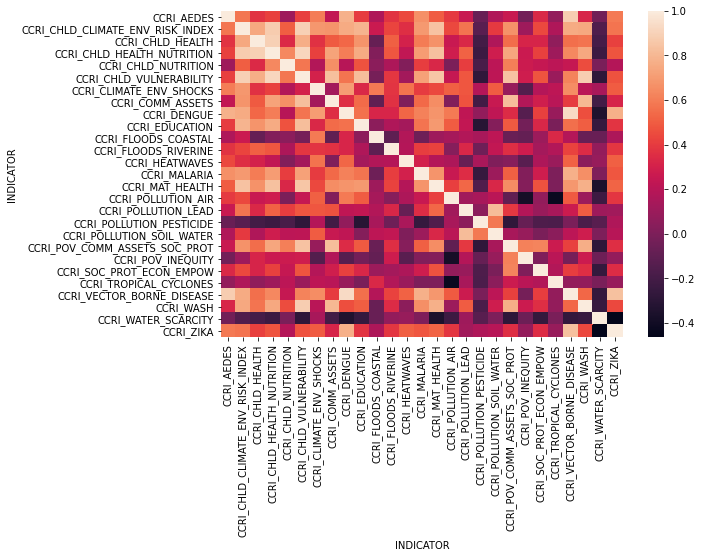

In [14]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(context_corr, ax=ax)